In [1]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('C:\\Users\\kamar\\Downloads\\retail_sales_dataset.csv')


# Inspect data
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [2]:
# Drop rows with critical missing values
df = df.dropna(subset=['Customer ID'])

# Impute missing values for numerical columns
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].mean())

# Drop duplicates
df = df.drop_duplicates()

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

# Ensure numerical columns are of correct type
df['Price per Unit'] = df['Price per Unit'].astype(float)
df['Quantity'] = df['Quantity'].astype(int)


In [4]:
df['Total Sales'] = df['Quantity'] * df['Price per Unit']

In [5]:
df['Day of Week'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Week Number'] = df['Date'].dt.isocalendar().week


In [6]:
print(df.describe())

       Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price per Unit  Total Amount  Total Sales        Month         Year  \
count     1000.000000   1000.000000  1000.000000  1000.000000  1000.000000   
mean       179.890000    456.000000   456.000000     6.549000  2023.002000   
min         25.000000     25.000000 

Matplotlib is building the font cache; this may take a moment.


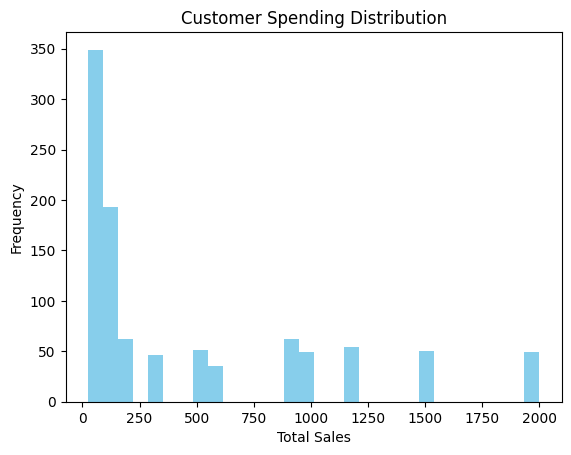

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for total spending
plt.hist(df['Total Sales'], bins=30, color='skyblue')
plt.title('Customer Spending Distribution')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()


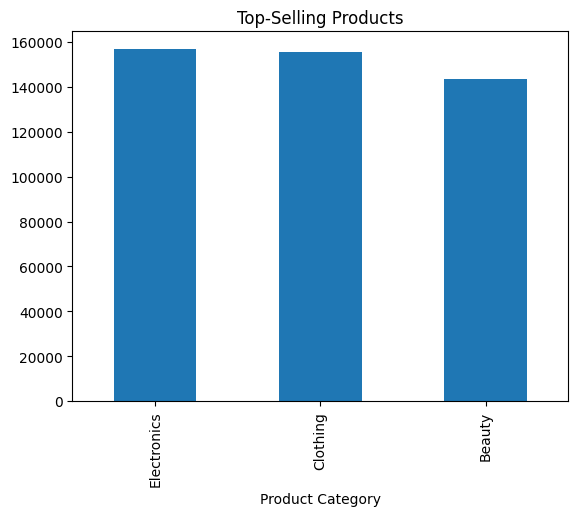

In [9]:
top_products = df.groupby('Product Category')['Total Sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title="Top-Selling Products")
plt.show()


In [13]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Prepare data for clustering
customer_data = df.groupby('Customer ID').agg({'Total Sales': 'sum', 'Date': 'count'}).reset_index()
customer_data.columns = ['Customer ID', 'Total Spending', 'Frequency']

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(customer_data[['Total Spending', 'Frequency']])

kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

In [15]:
high_spenders = customer_data[customer_data['Cluster'] == 0]
print(high_spenders.describe())

       Total Spending  Frequency  Cluster
count      736.000000      736.0    736.0
mean       154.076087        1.0      0.0
std        157.650788        0.0      0.0
min         25.000000        1.0      0.0
25%         50.000000        1.0      0.0
50%        100.000000        1.0      0.0
75%        200.000000        1.0      0.0
max        600.000000        1.0      0.0


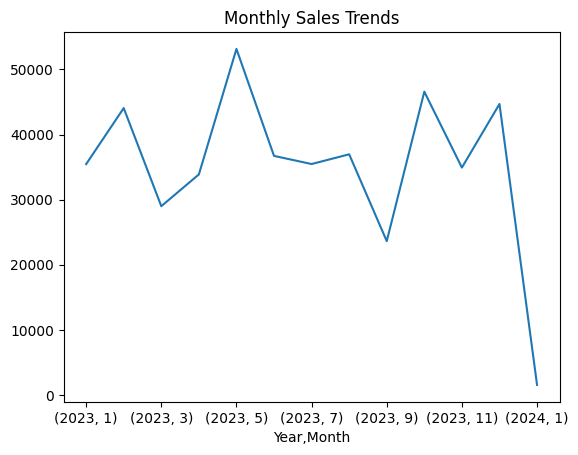

In [16]:
monthly_sales = df.groupby(['Year', 'Month'])['Total Sales'].sum()
monthly_sales.plot(kind='line', title="Monthly Sales Trends")
plt.show()

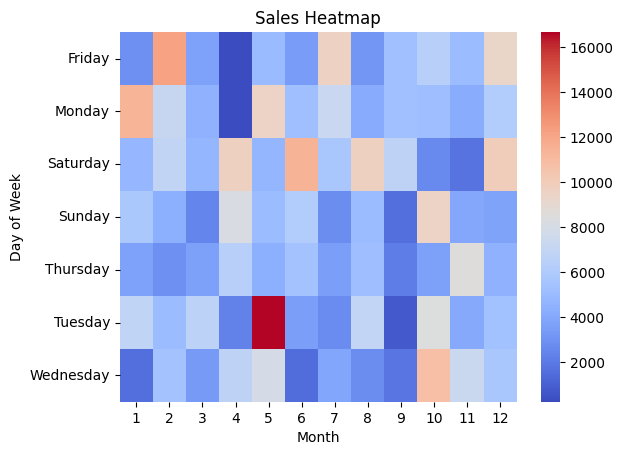

In [17]:
sns.heatmap(df.pivot_table(index='Day of Week', columns='Month', values='Total Sales', aggfunc='sum'), cmap='coolwarm')
plt.title('Sales Heatmap')
plt.show()